In [1]:
# -*- coding:utf-8 -*-
import sys
sys.path.append("../../")
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [2]:
from draw_set import seaborn_set
seaborn_set()

In [3]:
def meituan_spyder(url, ):
    '''
    读取美团的评价的打分和评论
    :param url: (String) 美图品佳的链接
    :return:
    '''
    return_dict = {"star":[], "comment":[], "tag_count_df":0 }
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) Chrome/50.0.2661.102',}
    html = requests.get(url, headers=headers).text  # 读取页面的信息
    all_info = BeautifulSoup(html, 'html5lib').find("body").string
    info_dict = json.loads(all_info)
    # pprint(info_dict)

    # 提取打分和评论
    comments = info_dict["comments"]
    for pearson in comments:
        star = pearson["star"]
        comment = pearson["comment"]
        return_dict["star"].append(star)
        return_dict["comment"].append(comment)

    # 提取标签和文字
    tag_count = np.array([[d["count"], d["tag"]] for d in info_dict["tags"]])
    tag_count_df = pd.DataFrame(tag_count, columns=["count", "tag"])
    return_dict["tag_count_df"] = tag_count_df

    # 评论信息读取
    return return_dict

In [4]:
url="https://www.meituan.com/ptapi/poi/getcomment?id=1679122&offset=0&pageSize=10&mode=0&sortType=1"
return_dict = meituan_spyder(url)
df = return_dict["tag_count_df"]
df["count"] = df["count"].apply(np.int)
df

,count,tag
0,394,环境优雅
1,139,地方赞
2,102,人气旺
3,76,干净卫生
4,65,停车方便
5,64,场地赞
6,7,交通便利
7,3,水干净
8,3,项目少
9,3,水脏


In [5]:
# 保证seaborn可以显示中文，目前只能这么做。
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname='C:/Windows/Fonts/simhei.ttf',size=14)
sns.set(font=myfont.get_name())

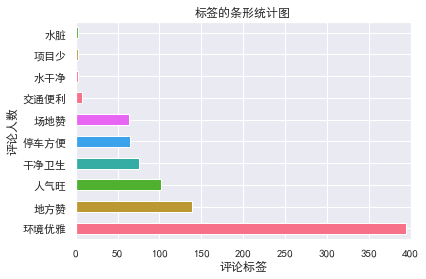

In [7]:
seaborn_set()
fig, ax = plt.subplots()
df.plot(kind="barh", x="tag", y="count", ax=ax)
ax.set(title="标签的条形统计图", xlabel="评论标签", ylabel="评论人数", xlim=[0,400])
ax.legend().set_visible(False)

In [6]:
fig.savefig("C:/Users/HuZheHui/Desktop/1.svg", transparent=False,bbox_inches="tight")